In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
data =  pd.read_csv('/IMDB_movie_reviews.csv')

In [ ]:
data.describe()

,Movie_title,User_name,Review_title,Review_rating,Review_date,Review_body
count,15279,15279,15279,15279,15279,11512
unique,4,14534,13907,10,1476,11499
top,Captain Marvel,rupert-ian,Disappointing,1/10,9 March 2019,"As a life long marvel fan, I am deeply saddene..."
freq,7297,6,44,3672,1159,2


In [ ]:
# We need to check null values in dataset
data.isnull().sum()

Movie_title         0
User_name           0
Review_title        0
Review_rating       0
Review_date         0
Review_body      3767
dtype: int64

Understandable since not every body writes a long review and convey what they want to say in title itself.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        punctuation = set(string.punctuation)

        words = word_tokenize(text.lower())
        cleaned_words = [word for word in words if word not in stop_words and word not in punctuation]

        return ' '.join(cleaned_words)
    else:
        return ""

# Step 5: Apply the cleaning function to the DataFrame to clean the 'text' column
data['Review_title'] = data['Review_title'].apply(clean_text)
data['Review_body'] = data['Review_body'].apply(clean_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# To check duplicated values
data.duplicated().value_counts()

False    15273
True         6
dtype: int64

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

                    Movie_title         User_name  \
4934   Star Wars: The Last Jedi         icenash99   
6132   Star Wars: The Last Jedi        MrSelfPaid   
6355   Star Wars: The Last Jedi  crimson_knight_7   
6838   Star Wars: The Last Jedi   dgardiner-16144   
13270            Captain Marvel    yasmimjteodoro   
14321            Captain Marvel        monjarenko   

                       Review_title Review_rating       Review_date  \
4934           worse phantom menace          1/10   4 November 2019   
6132    failed exile disney must go          2/10  30 December 2017   
6355   episode 8 wasted opportunity          3/10   17 January 2018   
6838           worse phantom menace          4/10    1 January 2018   
13270             wonderful movieee          6/10      6 April 2019   
14321                 captain brick          2/10   19 January 2022   

                                             Review_body  
4934                                                      
6132   first

Probably a coincedence or may be a fake review, lets find out.


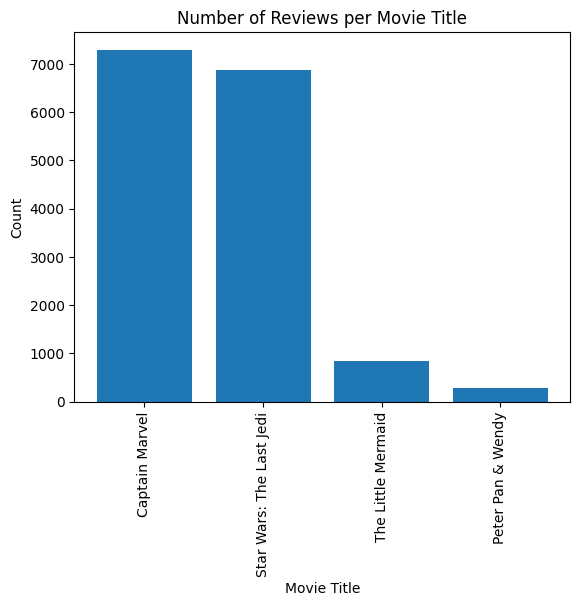

In [ ]:

# Bar chart for Movie_title
movie_title_counts = data['Movie_title'].value_counts()
plt.bar(movie_title_counts.index, movie_title_counts.values)
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Number of Reviews per Movie Title')
plt.xticks(rotation=90)
plt.show()


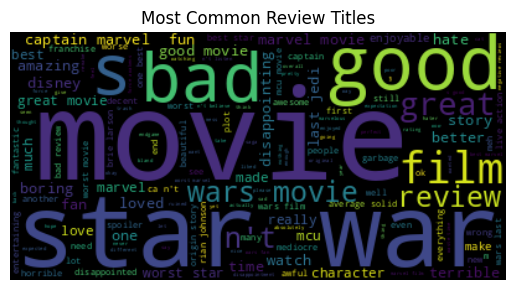

In [ ]:
# Word cloud for Review_title
review_title_wordcloud = WordCloud().generate(' '.join(data['Review_title']))
plt.imshow(review_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Review Titles')
plt.show()

In [ ]:
data['Review_body'] = data['Review_body'].astype(str)

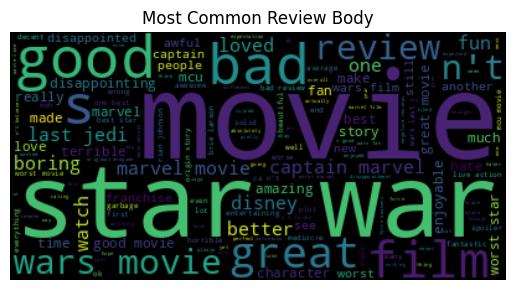

In [ ]:
# Word cloud for Review_title
Review_body_wordcloud = WordCloud().generate(' '.join(data['Review_title']))
plt.imshow(Review_body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Review Body')
plt.show()

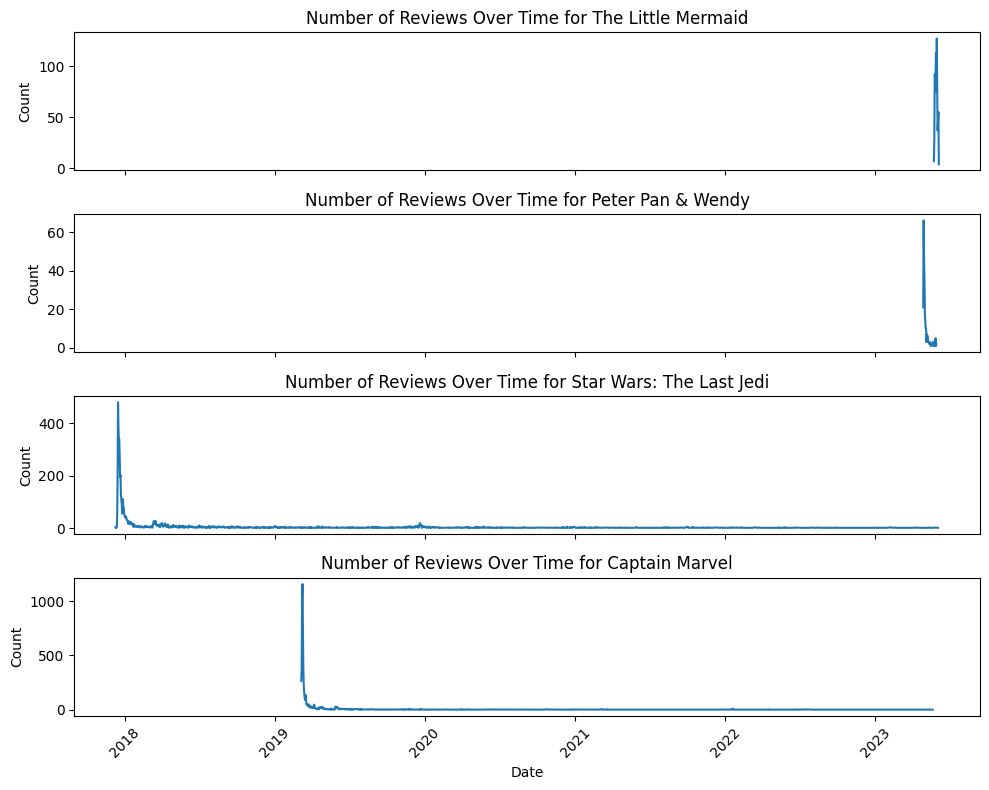

In [ ]:

data['Review_date'] = pd.to_datetime(data['Review_date'])
movies = data['Movie_title'].unique()
fig, axs = plt.subplots(len(movies), 1, figsize=(10, 8), sharex=True)

for i, movie in enumerate(movies):
    movie_data = data[data['Movie_title'] == movie]
    review_date_counts = movie_data['Review_date'].value_counts().sort_index()
    axs[i].plot(review_date_counts.index, review_date_counts.values)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Number of Reviews Over Time for {movie}')
    axs[i].tick_params(axis='x', rotation=45)
plt.xlabel('Date')
plt.tight_layout()
plt.show()




In [ ]:
data['Review_rating'] = pd.to_numeric(data['Review_rating'].str.replace('/10', ''))
good_reviews = data[data['Review_rating'] >= 3]
bad_reviews = data[data['Review_rating'] < 3]


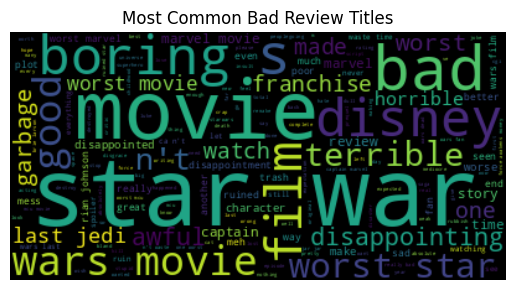

In [ ]:
# Word cloud for Review_title
Bad_review_title_wordcloud = WordCloud().generate(' '.join(bad_reviews['Review_title']))
plt.imshow(Bad_review_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Bad Review Titles')
plt.show()

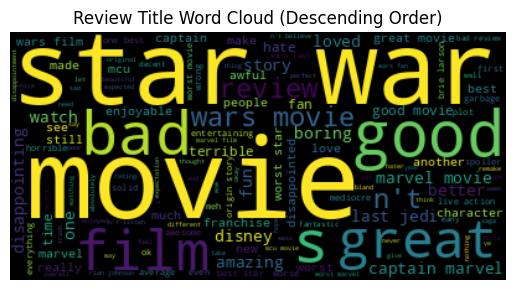

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the review titles into a single string
review_titles = ' '.join(data['Review_title'])

# Generate the word cloud with descending order of word frequency
wordcloud = WordCloud().generate(review_titles)

# Sort the words by frequency in descending order
sorted_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)

# Create a new WordCloud object with sorted words
sorted_wordcloud = WordCloud().generate_from_frequencies(dict(sorted_words))

# Plot the word cloud
plt.imshow(sorted_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Review Title Word Cloud (Descending Order)')
plt.show()


In [ ]:
from wordcloud import WordCloud

# Concatenate the review titles into a single string
review_titles = ' '.join(data['Review_title'])

# Generate the word cloud with descending order of word frequency
wordcloud = WordCloud().generate(review_titles)

# Sort the words by frequency in descending order
sorted_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)

# Print the words in descending order
for word, frequency in sorted_words:
    print(f'{word}: {frequency}')


movie: 1.0
star war: 1.0
good: 0.4307800421644413
s: 0.39002108222066056
bad: 0.38299367533380185
film: 0.3169360505973296
great: 0.29234012649332397
wars movie: 0.23049894588896697
review: 0.22768798313422348
n't: 0.22276879831342233
captain marvel: 0.20941672522839072
boring: 0.20590302178496134
marvel movie: 0.19465917076598735
last jedi: 0.18341531974701336
one: 0.17427969079409697
disney: 0.1735769501054111
watch: 0.1651440618411806
fun: 0.15460295151089248
better: 0.15249472944483486
loved: 0.151791988756149
disappointing: 0.1482782853127196
amazing: 0.14125087842586087
story: 0.13633169360505973
good movie: 0.1286015460295151
fan: 0.12789880534082923
time: 0.12297962052002812
terrible: 0.11876317638791287
hate: 0.11243851018973998
great movie: 0.11243851018973998
marvel: 0.11033028812368235
best: 0.10962754743499649
character: 0.10822206605762473
really: 0.10330288123682362
worst star: 0.10119465917076599
mcu: 0.09838369641602249
made: 0.09768095572733661
love: 0.094167252283907

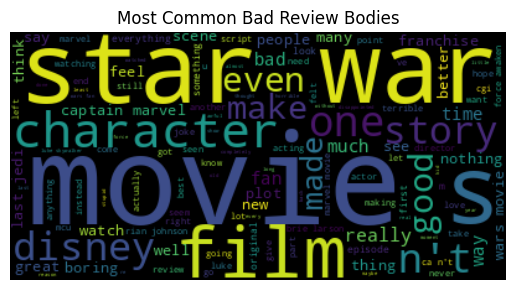

In [ ]:
# Word cloud for Review_title
Bad_Review_body_wordcloud = WordCloud().generate(' '.join(bad_reviews['Review_body']))
plt.imshow(Bad_Review_body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Bad Review Bodies')
plt.show()

In [ ]:
from wordcloud import WordCloud

# Concatenate the review titles into a single string
Review_body = ' '.join(data['Review_body'])

# Generate the word cloud with descending order of word frequency
wordcloud = WordCloud().generate(Review_body)

# Sort the words by frequency in descending order
sorted_words = sorted(wordcloud.words_.items(), key=lambda x: x[1], reverse=True)

# Print the words in descending order
for word, frequency in sorted_words:
    print(f'{word}: {frequency}')


movie: 1.0
film: 0.7593707754700749
star war: 0.7457293842939658
s: 0.6910409241735284
character: 0.49748064397197983
captain marvel: 0.4266928843554135
one: 0.4184588914833477
story: 0.35602802015484825
much: 0.2599238048420794
even: 0.25500798820204007
good: 0.24652820449797222
make: 0.23743394371389948
brie larson: 0.23153496374585228
time: 0.23030600958584244
n't: 0.22145753963377166
feel: 0.21985989922575888
last jedi: 0.21617303674572938
way: 0.21568145508172545
great: 0.21260906968170087
disney: 0.20781614845766253
think: 0.19503502519356028
made: 0.1883986727295072
thing: 0.18790709106550327
scene: 0.18729261398549835
well: 0.18422022858547377
really: 0.18127073860145015
lot: 0.18090205235344722
plot: 0.16738355659333906
marvel movie: 0.15263610667322108
see: 0.15202162959321616
people: 0.14759739461718077
better: 0.14698291753717585
first: 0.1467371267051739
look: 0.1439105321371513
say: 0.13850313383310803
felt: 0.1365368071770923
fan: 0.1343246896890746
still: 0.134201794273

In [ ]:
probable_fake_reviews = data[data['Review_rating'] == 1]

In [ ]:
probable_fake_reviews.describe()

,Review_rating
count,3672.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


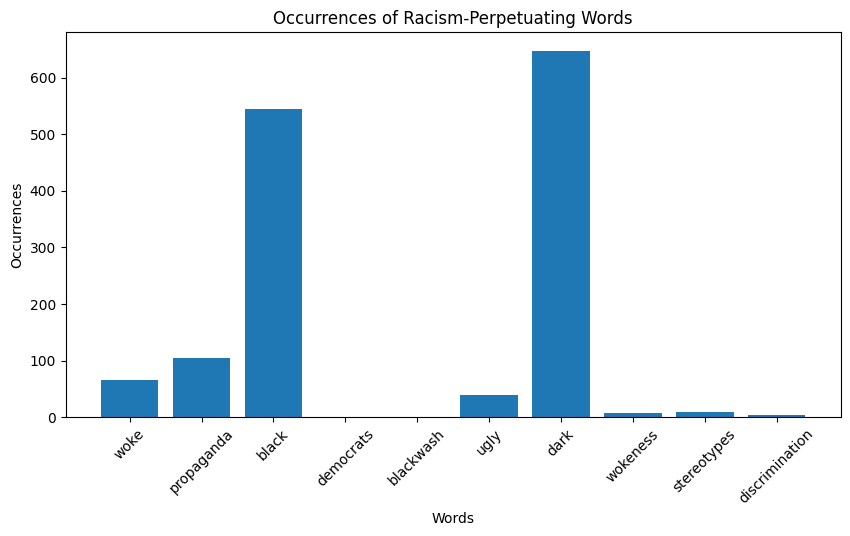

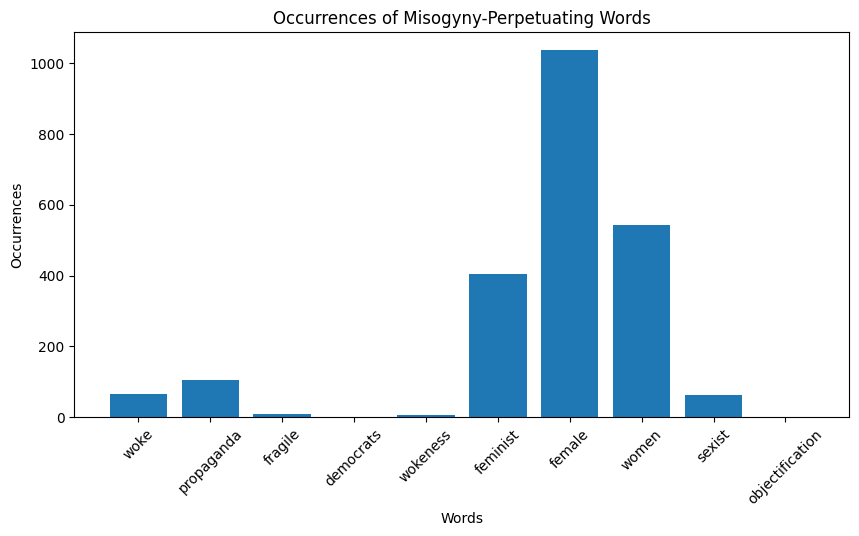

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate review titles and review bodies into a single string
all_reviews = ' '.join(data['Review_title'].astype(str) + ' ' + data['Review_body'].astype(str))

# Define the racism-perpetuating and misogyny-perpetuating words
racism_perpetuating_words = ['woke', 'propaganda', 'black', 'democrats', 'blackwash', 'ugly', 'dark', 'wokeness', 'stereotypes', 'discrimination']
misogyny_perpetuating_words = ['woke', 'propaganda', 'fragile', 'democrats', 'wokeness', 'feminist', 'female', 'women', 'sexist', 'objectification']

# Count the occurrences of each word in the reviews
racism_perpetuating_counts = {word: all_reviews.lower().count(word) for word in racism_perpetuating_words}
misogyny_perpetuating_counts = {word: all_reviews.lower().count(word) for word in misogyny_perpetuating_words}

# Plot the occurrences for racism-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(racism_perpetuating_counts.keys(), racism_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Racism-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()

# Plot the occurrences for misogyny-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(misogyny_perpetuating_counts.keys(), misogyny_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Misogyny-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()


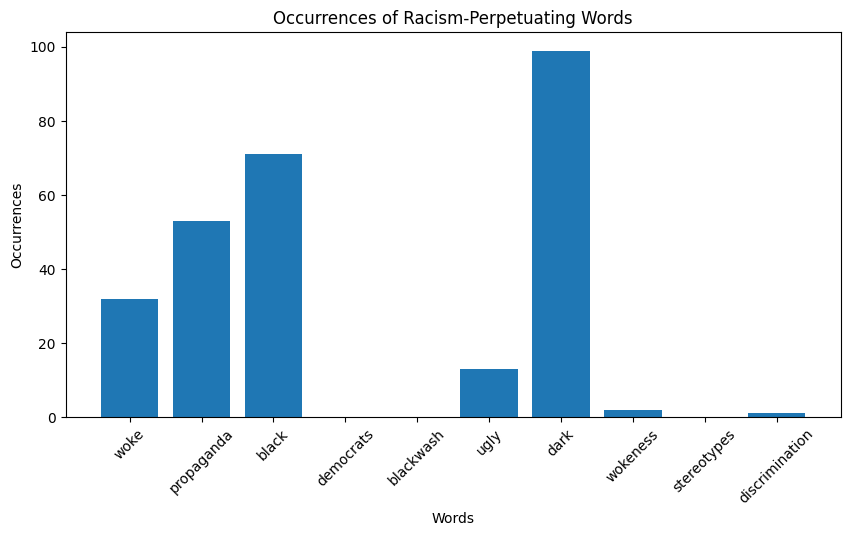

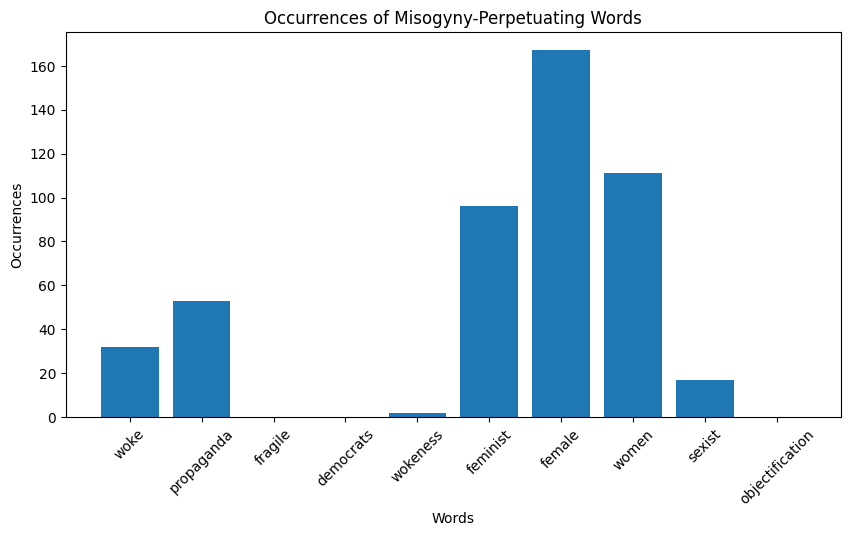

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate review titles and review bodies into a single string
all_reviews = ' '.join(probable_fake_reviews['Review_title'].astype(str) + ' ' + probable_fake_reviews['Review_body'].astype(str))

# Define the racism-perpetuating and misogyny-perpetuating words
racism_perpetuating_words = ['woke', 'propaganda', 'black', 'democrats', 'blackwash', 'ugly', 'dark', 'wokeness', 'stereotypes', 'discrimination']
misogyny_perpetuating_words = ['woke', 'propaganda', 'fragile', 'democrats', 'wokeness', 'feminist', 'female', 'women', 'sexist', 'objectification']

# Count the occurrences of each word in the reviews
racism_perpetuating_counts = {word: all_reviews.lower().count(word) for word in racism_perpetuating_words}
misogyny_perpetuating_counts = {word: all_reviews.lower().count(word) for word in misogyny_perpetuating_words}

# Plot the occurrences for racism-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(racism_perpetuating_counts.keys(), racism_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Racism-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()

# Plot the occurrences for misogyny-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(misogyny_perpetuating_counts.keys(), misogyny_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Misogyny-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:
probable_fake_reviews2 = data[data['Review_rating'] == 10]

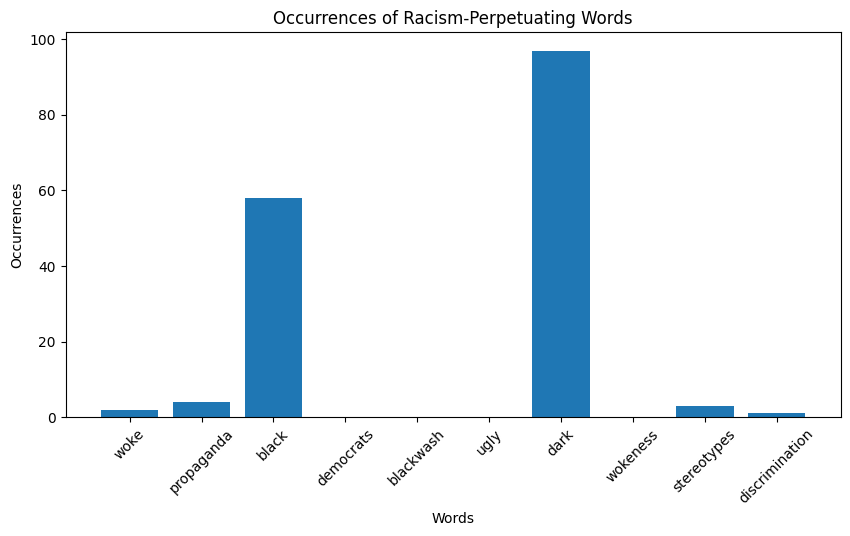

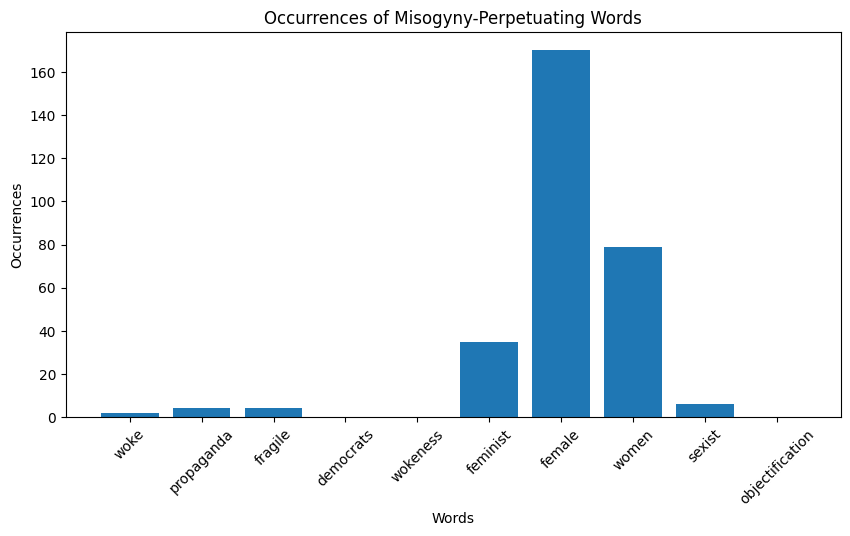

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate review titles and review bodies into a single string
all_reviews = ' '.join(probable_fake_reviews2['Review_title'].astype(str) + ' ' + probable_fake_reviews2['Review_body'].astype(str))

# Define the racism-perpetuating and misogyny-perpetuating words
racism_perpetuating_words = ['woke', 'propaganda', 'black', 'democrats', 'blackwash', 'ugly', 'dark', 'wokeness', 'stereotypes', 'discrimination']
misogyny_perpetuating_words = ['woke', 'propaganda', 'fragile', 'democrats', 'wokeness', 'feminist', 'female', 'women', 'sexist', 'objectification']

# Count the occurrences of each word in the reviews
racism_perpetuating_counts = {word: all_reviews.lower().count(word) for word in racism_perpetuating_words}
misogyny_perpetuating_counts = {word: all_reviews.lower().count(word) for word in misogyny_perpetuating_words}

# Plot the occurrences for racism-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(racism_perpetuating_counts.keys(), racism_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Racism-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()

# Plot the occurrences for misogyny-perpetuating words
plt.figure(figsize=(10, 5))
plt.bar(misogyny_perpetuating_counts.keys(), misogyny_perpetuating_counts.values())
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Occurrences of Misogyny-Perpetuating Words')
plt.xticks(rotation=45)
plt.show()


In [ ]:

def map_sentiment(rating):
    return 'positive' if rating >= 5 else 'negative'
data['Sentiment'] = data['Review_rating'].apply(lambda rating: map_sentiment(rating))


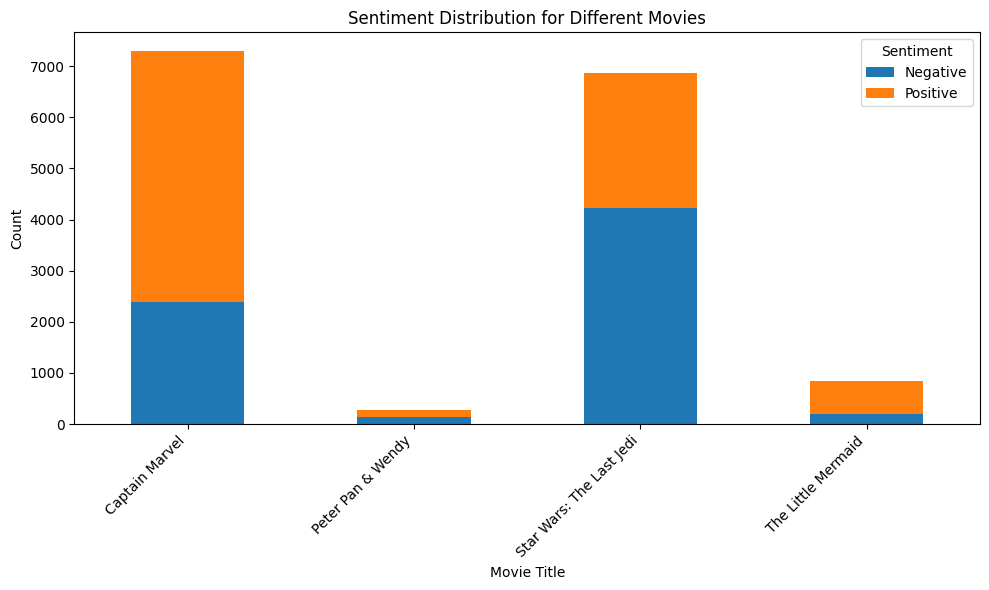

In [ ]:

sentiment_counts = data.groupby(['Movie_title', 'Sentiment']).size().unstack(fill_value=0)

# Plot the bar chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Movies')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming you have already read the CSV file into the 'data' DataFrame
# and the 'Sentiment' column has been created as shown in the previous code

# Function to map sentiment to numerical values (1 for positive, 0 for negative)
def map_sentiment_to_numeric(sentiment):
    return 1 if sentiment == 'positive' else 0

# Map 'Sentiment' to numeric values (1 or 0)
data['Sentiment_numeric'] = data['Sentiment'].apply(map_sentiment_to_numeric)

# Group the data by Movie_title and calculate the average sentiment score for each movie
sentiment_analysis = data.groupby('Movie_title')['Sentiment_numeric'].mean().reset_index()

# Sort the movies based on average sentiment score (descending order)
sentiment_analysis = sentiment_analysis.sort_values(by='Sentiment_numeric', ascending=False)

# Print the top 10 movies with the highest average sentiment score
top_10_positive_movies = sentiment_analysis.head(10)
print("Top 10 Positive Movies:")
print(top_10_positive_movies)

# Print the bottom 10 movies with the lowest average sentiment score
bottom_10_negative_movies = sentiment_analysis.tail(10)
print("\nBottom 10 Negative Movies:")
print(bottom_10_negative_movies)


Top 10 Positive Movies:
                Movie_title  Sentiment_numeric
3        The Little Mermaid           0.764916
0            Captain Marvel           0.672742
1         Peter Pan & Wendy           0.482143
2  Star Wars: The Last Jedi           0.384761

Bottom 10 Negative Movies:
                Movie_title  Sentiment_numeric
3        The Little Mermaid           0.764916
0            Captain Marvel           0.672742
1         Peter Pan & Wendy           0.482143
2  Star Wars: The Last Jedi           0.384761


In [ ]:
filtered_df = data.loc[data['Review_rating'] == 1, ['Review_title', 'Review_rating', 'Review_body']]

In [ ]:
filtered_df.head()

,Review_title,Review_rating,Review_body
3,daughter bored tears,1,took seven year old see last night fine first ...
13,another pointless remake 's worse original,1,latest disney 's attempt cash old ips instead ...
23,went expecting bad somehow still disappointed,1,far absolute worst disney live action remake m...
26,unapologetically mediocre,1,little mermaid like disney parade bridgerton b...
29,disney magic,1,took children watch memorial day weekend satur...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already read the CSV file into the 'data' DataFrame
# and the 'Sentiment' column has been created as shown in the previous code

# Step 1: Preprocess the data (if not done previously)

# Step 2: Split the data into training and testing sets
X = data['Review_title']  # Input features (movie reviews)
y = data['Sentiment']  # Output target (sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4 to 7: Choose candidate models, train, and evaluate them
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SVM', SVC(kernel='linear', C=1.0, random_state=42))
]

for name, model in models:
    print(f"\n--- {name} ---")
    clf = Pipeline([
        ('classifier', model)
    ])

    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Step 8: Select the best model based on evaluation results and hyperparameter tuning
# In this example, the model with the highest accuracy can be considered the best.

# Step 9: Test the final model on new, unseen data (if available)
# The final model can be used for sentiment prediction on new movie reviews.



--- Logistic Regression ---
Accuracy: 0.7664
Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74      1327
    positive       0.81      0.77      0.79      1729

    accuracy                           0.77      3056
   macro avg       0.76      0.77      0.76      3056
weighted avg       0.77      0.77      0.77      3056

Confusion Matrix:
[[1005  322]
 [ 392 1337]]

--- Random Forest ---
Accuracy: 0.7497
Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.75      0.72      1327
    positive       0.80      0.75      0.77      1729

    accuracy                           0.75      3056
   macro avg       0.75      0.75      0.75      3056
weighted avg       0.75      0.75      0.75      3056

Confusion Matrix:
[[ 993  334]
 [ 431 1298]]

--- SVM ---
Accuracy: 0.7588
Classification Report:
              precision    recall  f1-score   support

    negative    

Epoch 1/5
24/24 [==============================] - 129s 5s/step - loss: 0.6675 - accuracy: 0.5886
Epoch 2/5
24/24 [==============================] - 124s 5s/step - loss: 0.4884 - accuracy: 0.7825
Epoch 3/5
24/24 [==============================] - 123s 5s/step - loss: 0.3864 - accuracy: 0.8396
Epoch 4/5
24/24 [==============================] - 122s 5s/step - loss: 0.3387 - accuracy: 0.8600
Epoch 5/5
96/96 [==============================] - 19s 190ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.73      0.72      1327
    positive       0.79      0.78      0.78      1729

    accuracy                           0.75      3056
   macro avg       0.75      0.75      0.75      3056
weighted avg       0.76      0.75      0.75      3056

Confusion Matrix:
[[ 964  363]
 [ 387 1342]]


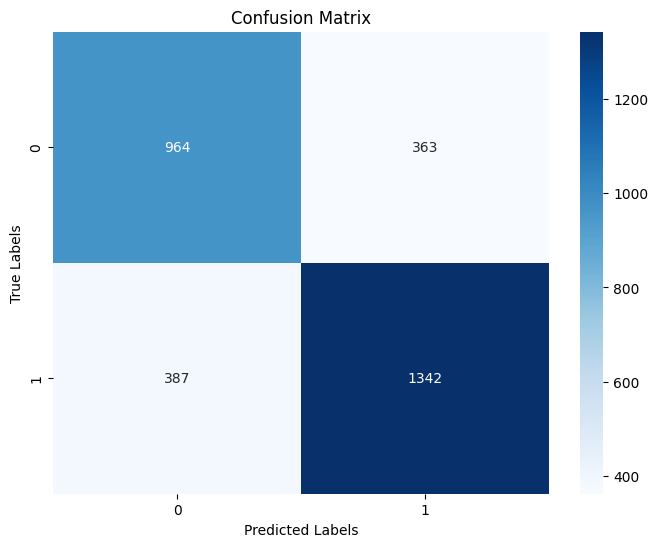

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have X and y defined

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)  # Increase the vocabulary size
tokenizer.fit_on_texts(X_train)

X_train_lstm = tokenizer.texts_to_sequences(X_train)
X_test_lstm = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(max(len(seq) for seq in X_train_lstm), max(len(seq) for seq in X_test_lstm))
max_sequence_length = min(max_sequence_length, 300)  # Limit sequence length for efficiency
X_train_lstm = pad_sequences(X_train_lstm, maxlen=max_sequence_length)
X_test_lstm = pad_sequences(X_test_lstm, maxlen=max_sequence_length)

# Hyperparameters
embedding_dim = 300  # Increase embedding dimension
lstm_units = 512  # Increase LSTM units
dropout_rate = 0.2  # Reduce dropout rate
recurrent_dropout_rate = 0.1  # Reduce recurrent dropout rate
batch_size = 512  # Increase batch size
epochs = 5  # Increase number of epochs

# Build the LSTM model
model = Sequential()
model.add(Embedding(20000, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout_rate)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train_lstm, y_train_encoded, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test_lstm)
y_pred_labels = label_encoder.inverse_transform((y_pred_encoded > 0.5).astype(int))

# Evaluate the model
report = classification_report(y_test, y_pred_labels)
print("Classification Report:")
print(report)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
